In [15]:
import torch
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [16]:
filename = "dce_tensordata"
mri_tensor = torch.load(f"/home/suhkth/Desktop/DL-Breast-MRI-Tumor-Segmentation/{filename}.pth") # need to modified if necessary
print("MRI tensor shape:", mri_tensor.shape)

MRI tensor shape: torch.Size([1388, 6, 300, 300])


In [18]:
#  🔄 Convert to NumPy and normalize function

mri_numpy = mri_tensor.numpy()

# Normalization function for individual 2D slices
def normalize_slice(slice_2d):
    min_val = np.min(slice_2d)
    max_val = np.max(slice_2d)
    if max_val - min_val == 0:
        # Avoid divide by zero if slice is uniform
        return np.zeros_like(slice_2d, dtype=np.uint8)
    slice_2d_norm = (slice_2d - min_val) / (max_val - min_val)
    slice_2d_255 = (slice_2d_norm * 255).astype(np.uint8)
    return slice_2d_255

In [ ]:
def apply_colormap(slice_2d_norm, cmap='plasma'):
    """
    Apply a matplotlib colormap to a 2D array that's already [0..1].
    Returns a (H, W, 3) RGB image in [0..255].
    """
    # Use matplotlib's get_cmap
    cm = plt.cm.get_cmap(cmap)
    # Apply colormap -> returns RGBA
    colored = cm(slice_2d_norm)
    # Convert RGBA -> RGB and scale to 0..255
    colored_rgb = (colored[..., :3] * 255).astype(np.uint8)
    return colored_rgb

In [20]:
# Create Output Folders
gray_dir = "mri_png_slices_gray"
plasma_dir = "mri_png_slices_plasma"
os.makedirs(gray_dir, exist_ok=True)
os.makedirs(plasma_dir, exist_ok=True)

In [ ]:
# 💾  Save Slices in Both Grayscale & Plasma
num_slices, num_channels, height, width = mri_numpy.shape
print(f"Saving {num_slices} slices x {num_channels} channels => {num_slices*num_channels} images each in two folders...")

for slice_idx in range(num_slices):
    for ch_idx in range(num_channels):
        slice_2d = mri_numpy[slice_idx, ch_idx]

        # -------- GRAYSCALE --------
        gray_img = normalize_slice(slice_2d)
        Image.fromarray(gray_img).save(
            os.path.join(gray_dir, f"slice_{slice_idx:04d}_ch_{ch_idx}.png")
        )

        # -------- COLORMAP: PLASMA --------
        # First normalize to [0..1] for colormap
        slice_norm_01 = (slice_2d - slice_2d.min()) / (slice_2d.max() - slice_2d.min() + 1e-9)
        colored_rgb = apply_colormap(slice_norm_01, cmap='plasma')
        Image.fromarray(colored_rgb).save(
            os.path.join(plasma_dir, f"slice_{slice_idx:04d}_ch_{ch_idx}.png")
        )
        

print("✅ Done! Grayscale images in:", gray_dir)
print("✅ Done! Plasma-colored images in:", plasma_dir)


Saving 1388 slices x 6 channels => 8328 images each in two folders...


TypeError: ColormapRegistry.__call__() takes 1 positional argument but 2 were given

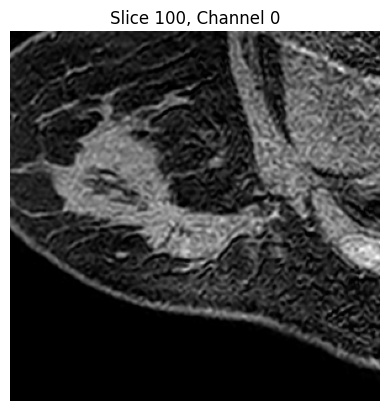

In [ ]:
# 👁️ Preview one sample image
sample_slice = 100
sample_channel = 0

# Show grayscale
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title(f"Grayscale: slice {sample_slice}, channel {sample_channel}")
plt.axis('off')
plt.show()


In [ ]:
# Show plasma
plt.subplot(1, 2, 2)
plt.imshow(colored_rgb)
plt.title(f"Plasma: slice {sample_slice}, channel {sample_channel}")
plt.axis('off')
plt.show()